In [2]:
# Joshua Perez

'''The following acknowledges Joseph Lee Wei En of https://medium.com/@josephleeweien
    Their code provided the demonstrations below'''


import pandas as pd

In [3]:
df = pd.read_csv('housepricedata.csv')

In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
# Turn the dataset into a datastructure
dataset = df.values

In [6]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [7]:
# Assign each column besides the last to X
# Assign the last column to Y
# Splitting the array into inputs X that can determine an output Y
X = dataset[:,0:10]
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
# Finished processing the dataset
# Moving on to the Building and training of the neural network
# Importing keras to describe the networks layers
from keras.models import Sequential
from keras.layers import Dense

In [16]:
# 2 hidden layers made of 32 neurons
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
# the algorithm is set and now needs to be trained
# configure the model beforehand to describe how we want it to optimize, configure the error rate, and keep track of accuracy
# this helps us get the best results
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.6845 - accuracy: 0.5010 - val_loss: 0.6726 - val_accuracy: 0.5616
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5010 - val_loss: 0.6682 - val_accuracy: 0.5616
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5010 - val_loss: 0.6641 - val_accuracy: 0.5662
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5020 - val_loss: 0.6604 - val_accuracy: 0.5708
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.5088 - val_loss: 0.6558 - val_accuracy: 0.5799
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.5284 - val_loss: 0.6514 - val_accuracy: 0.6027
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.5656 - val_loss: 0.6471 - val_accuracy: 0.6712
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8728 - val_loss: 0.3737 - val_accuracy: 0.8493
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8738 - val_loss: 0.3727 - val_accuracy: 0.8584
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8757 - val_loss: 0.3711 - val_accuracy: 0.8584
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8718 - val_loss: 0.3700 - val_accuracy: 0.8584
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8738 - val_loss: 0.3690 - val_accuracy: 0.8584
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8767 - val_loss: 0.3680 - val_accuracy: 0.8584
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8728 - val_loss: 0.3673 - val_accuracy: 0.8630
Epoch 

In [19]:
# evaluate the data by putting it into the test set
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9224


0.922374427318573

In [20]:
import matplotlib.pyplot as plt

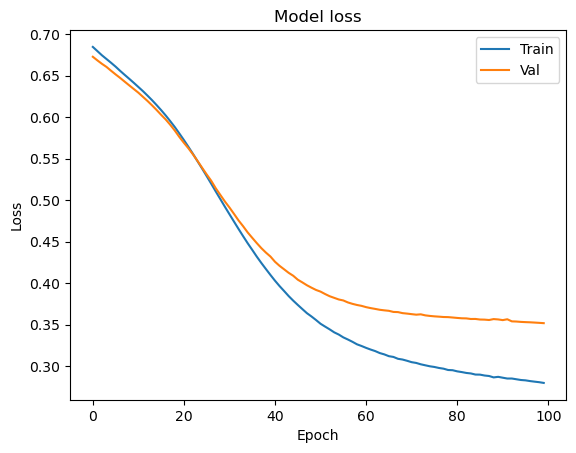

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

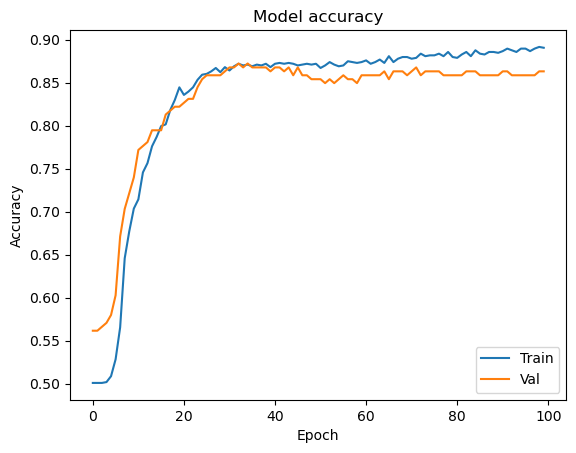

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [26]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4526 - accuracy: 0.7965 - val_loss: 0.4305 - val_accuracy: 0.8584
Epoch 2/100
32/32 [==============================] - 0s 16ms/step - loss: 0.3275 - accuracy: 0.8669 - val_loss: 0.4112 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 1s 16ms/step - loss: 0.3182 - accuracy: 0.8728 - val_loss: 0.3675 - val_accuracy: 0.8493
Epoch 4/100
32/32 [==============================] - 1s 16ms/step - loss: 0.2766 - accuracy: 0.8855 - val_loss: 0.3438 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 0s 15ms/step - loss: 0.2793 - accuracy: 0.8845 - val_loss: 0.3364 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 0s 15ms/step - loss: 0.3146 - accuracy: 0.8689 - val_loss: 0.3465 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 1s 16ms/step - loss: 0.2632 - accuracy: 0.8894 - val_loss: 0.3936 - val_accuracy: 0.8904
Epoch 

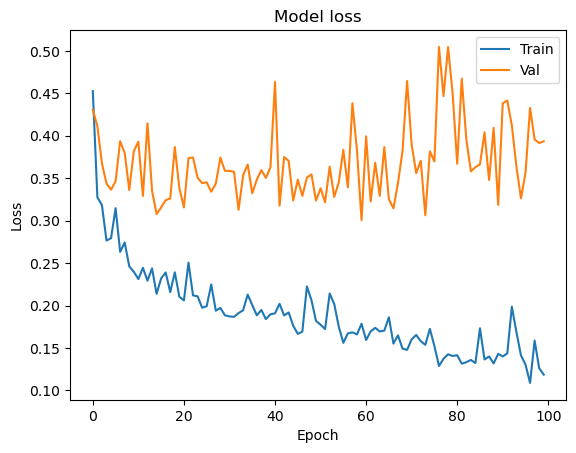

In [27]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

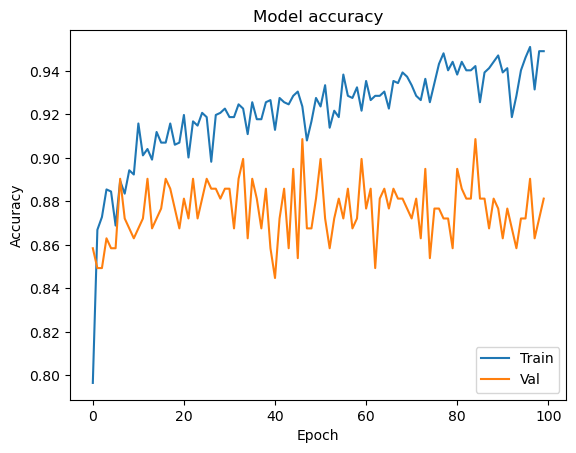

In [29]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
from keras.layers import Dropout
from keras import regularizers

In [31]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [32]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 44ms/step - loss: 14.2291 - accuracy: 0.6018 - val_loss: 3.9130 - val_accuracy: 0.8219
Epoch 2/100
32/32 [==============================] - 1s 30ms/step - loss: 1.6792 - accuracy: 0.8229 - val_loss: 0.7379 - val_accuracy: 0.8174
Epoch 3/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5716 - accuracy: 0.8689 - val_loss: 0.6017 - val_accuracy: 0.8174
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5082 - accuracy: 0.8679 - val_loss: 0.5237 - val_accuracy: 0.8539
Epoch 5/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4939 - accuracy: 0.8650 - val_loss: 0.5377 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4946 - accuracy: 0.8699 - val_loss: 0.5287 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 1s 29ms/step - loss: 0.5087 - accuracy: 0.8640 - val_loss: 0.5002 - val_accuracy: 0.8584
Epoch

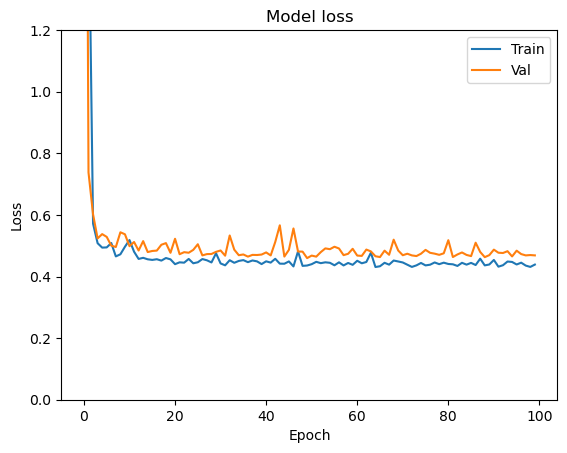

In [33]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

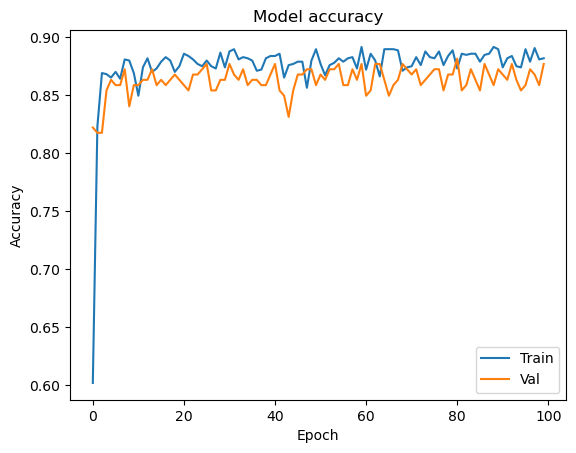

In [35]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()